## Bibliotecas

In [3]:
#Bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## 1. Fazendo  a limpeza de dados.

### 1.1 Carregando a base de dados

In [4]:
#Base de dados
carros = pd.read_csv('https://raw.githubusercontent.com/RafaelSilvax06/ProjetoIA-Car-Price-ML/refs/heads/main/data_base/car_sales_data.csv')
carros.head(30)


,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101
5,Ford,Focus,1.4,Petrol,2018,33603,29204
6,Ford,Mondeo,1.8,Diesel,2010,86686,14350
7,Toyota,Prius,1.4,Hybrid,2015,30663,30297
8,VW,Polo,1.2,Petrol,2012,73470,9977
9,Ford,Focus,2.0,Diesel,1992,262514,1049


### 1.2 Traduzindo titulos de colunas e convertando valor em reais.

In [5]:
#Traduzindo colunas
carros.columns = ['Fabricante', 'Modelo', 'Potencia Motor', 'Tipo Combustivel', 'Ano De Fabricação', 'Quilometragem', 'Preco']

#Convertando preço dos carros para reais.
carros['Preco'] = carros['Preco'].astype(float)
carros['Preco'] = carros['Preco'] * 5.38
carros.head()


,Fabricante,Modelo,Potencia Motor,Tipo Combustivel,Ano De Fabricação,Quilometragem,Preco
0,Ford,Fiesta,1.0,Petrol,2002,127300,16538.12
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,267407.52
2,Ford,Mondeo,1.6,Diesel,2014,39190,129507.36
3,Toyota,RAV4,1.8,Hybrid,1988,210814,9172.90
4,VW,Polo,1.0,Petrol,2006,127869,22063.38


### 1.3 Fazendo a limpeza de dados.
Verificando dados nulos, type de variaveis e valores de colunas.

In [6]:
#Limpeza dos dados
print('===== ANÁLISE INICIAL DA BASE DE DADOS =====\n')

# Informações gerais sobre o DataFrame
print('Informações gerais:')
print('------------------------------------------------')
carros.info()
print('\n')

# Verificação de valores nulos
print('Verificando se existem dados nulos:')
print('------------------------------------------------')
print(carros.isnull().sum())
print('\n')

# Estatísticas descritivas
print('Descrição dos dados numéricos (verificar se há algo fora do padrão):')
print('------------------------------------------------')
print(carros.describe())
print('\n')

print('===== FIM DA ANÁLISE INICIAL =====')

===== ANÁLISE INICIAL DA BASE DE DADOS =====

Informações gerais:
------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fabricante         50000 non-null  object 
 1   Modelo             50000 non-null  object 
 2   Potencia Motor     50000 non-null  float64
 3   Tipo Combustivel   50000 non-null  object 
 4   Ano De Fabricação  50000 non-null  int64  
 5   Quilometragem      50000 non-null  int64  
 6   Preco              50000 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 2.7+ MB


Verificando se existem dados nulos:
------------------------------------------------
Fabricante           0
Modelo               0
Potencia Motor       0
Tipo Combustivel     0
Ano De Fabricação    0
Quilometragem        0
Preco                0
dtype: int64


Descrição dos dados 

### 1.4 Dando drop em preços de carros irreais.

In [7]:
'''Analisando o bloco percebemos que existem carros com valores muitos irreais, decidimos remover os carros com valor de R$ 3.500,00'''
carros_valor_irreais = carros[carros['Preco'] <= 3500.00].sort_values(by='Preco')
carros.drop(index=carros_valor_irreais.index, inplace=True)
carros.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48711 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fabricante         48711 non-null  object 
 1   Modelo             48711 non-null  object 
 2   Potencia Motor     48711 non-null  float64
 3   Tipo Combustivel   48711 non-null  object 
 4   Ano De Fabricação  48711 non-null  int64  
 5   Quilometragem      48711 non-null  int64  
 6   Preco              48711 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 3.0+ MB


### 1.5 Convertando type de variaveis em colunas necessarias.
Ao analisar o info do grafico é preciso converter a coluna quilometragem em float

In [8]:
# Transformando quilometragem em float
carros['Quilometragem'] = carros['Quilometragem'].astype(float)
carros.head()

,Fabricante,Modelo,Potencia Motor,Tipo Combustivel,Ano De Fabricação,Quilometragem,Preco
0,Ford,Fiesta,1.0,Petrol,2002,127300.0,16538.12
1,Porsche,718 Cayman,4.0,Petrol,2016,57850.0,267407.52
2,Ford,Mondeo,1.6,Diesel,2014,39190.0,129507.36
3,Toyota,RAV4,1.8,Hybrid,1988,210814.0,9172.90
4,VW,Polo,1.0,Petrol,2006,127869.0,22063.38


## 2. Análise Das Variaveis Categoricas.
Analisando colunas 'Tipo Combustivel', 'Fabricante', 'Modelo' para entender seus dados.

### 2.1 Analise da coluna combustivel

Analisando os tipos de combustivel dos carros:
Tipo Combustivel
Petrol    24671
Diesel    12991
Hybrid    11049
Name: count, dtype: int64


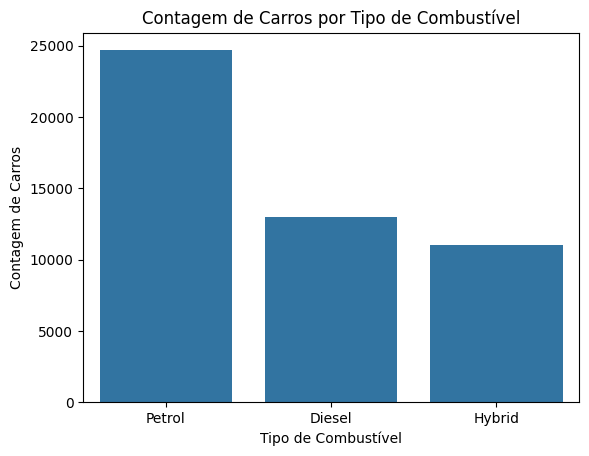

In [9]:
#Combutivel
print('Analisando os tipos de combustivel dos carros:')
contagem_combustivel = carros['Tipo Combustivel'].value_counts()
print(contagem_combustivel)

#Criando um grafico para visualizar as contagens de combustivel.
sns.countplot(data=carros, x='Tipo Combustivel', order=contagem_combustivel.index)
plt.title('Contagem de Carros por Tipo de Combustível')
plt.xlabel('Tipo de Combustível')
plt.ylabel('Contagem de Carros')
plt.show()

### 2.2 Analise da coluna fabricante.

Analisando os fabricantes dos carros:
<bound method NDFrame.head of Fabricante
Ford       14451
VW         14422
Toyota     12301
BMW         4936
Porsche     2601
Name: count, dtype: int64>


Total de fabricantes únicos: 5


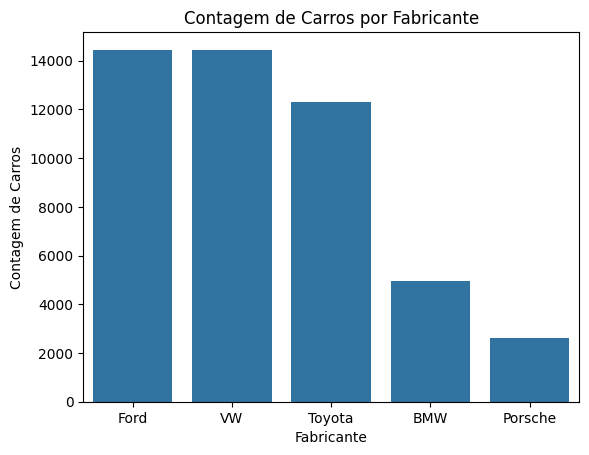

In [10]:
#Fabricante
print('Analisando os fabricantes dos carros:')
contagem_fabricante = carros['Fabricante'].value_counts()

#Imprimindo a contagem dos fabricantes
print(contagem_fabricante.head)
print('\n')

#Visualizando o total de fabricantes.
print('Total de fabricantes únicos:', carros['Fabricante'].nunique())

#Criando um grafico para visualizar as contagens de fabricantes.
sns.countplot(data=carros, x='Fabricante', order=contagem_fabricante.index)
plt.title('Contagem de Carros por Fabricante')
plt.xlabel('Fabricante')
plt.ylabel('Contagem de Carros')
plt.show()

### 2.3 Analise da coluna modelo

Analisando modelos dos carros
Modelo
Mondeo    4958
Golf      4906
Focus     4850
Passat    4790
Polo      4726
Fiesta    4643
RAV4      4259
Prius     4096
Yaris     3946
Z4        1678
Name: count, dtype: int64
Total de modelos: 15


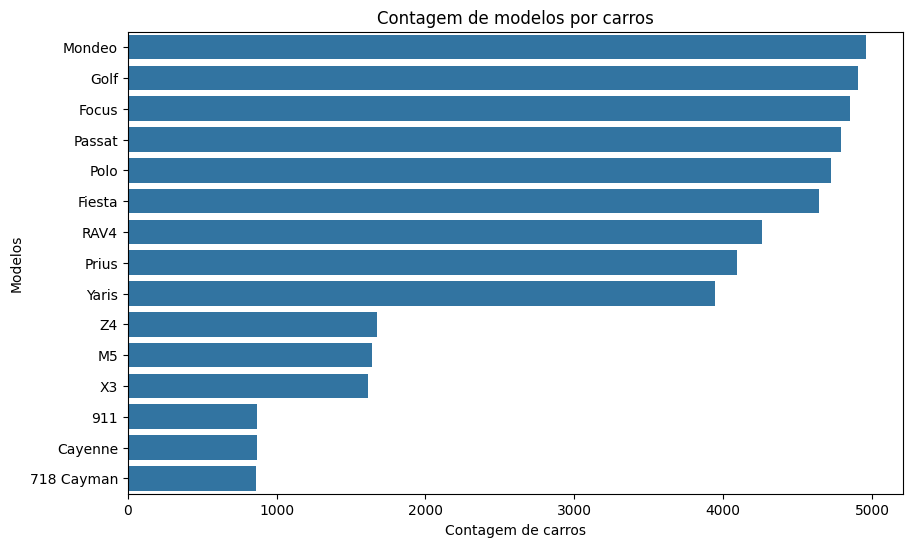

In [11]:
#Modelo
print('Analisando modelos dos carros')
contagem_modelos = carros['Modelo'].value_counts()

#Visualizando os 10 primeiros modelos.
print(contagem_modelos.head(10))

#Visualizando o total de modelos unicos por carros.
print(f'Total de modelos:', carros['Modelo'].nunique())

#Criando um grafico de barras para visualizar os modelos
plt.figure(figsize=(10,6))
sns.barplot(x=contagem_modelos.values, y=contagem_modelos.index, orient='h')
plt.title('Contagem de modelos por carros')
plt.xlabel('Contagem de carros')
plt.ylabel('Modelos')
plt.show()

## 3 Correlação de colunas númericas com o preço

### 3.1 Mapa de Calor.
Analisando as colunas com um mapa de calor, para entender a relação do preço com essas colunas.

In [12]:
# Coletando apenas as colunas númericas
colunas_numericas = ['Potencia Motor', 'Ano De Fabricação', 'Quilometragem', 'Preco']
df_numericas = carros[colunas_numericas]
df_numericas.head(10) 

,Potencia Motor,Ano De Fabricação,Quilometragem,Preco
0,1.0,2002,127300.0,16538.12
1,4.0,2016,57850.0,267407.52
2,1.6,2014,39190.0,129507.36
3,1.8,1988,210814.0,9172.90
4,1.0,2006,127869.0,22063.38
5,1.4,2018,33603.0,157117.52
6,1.8,2010,86686.0,77203.00
7,1.4,2015,30663.0,162997.86
8,1.2,2012,73470.0,53676.26
9,2.0,1992,262514.0,5643.62


Matriz de Correlação:
                   Potencia Motor  Ano De Fabricação  Quilometragem     Preco
Potencia Motor           1.000000          -0.021205       0.035283  0.394430
Ano De Fabricação       -0.021205           1.000000      -0.799800  0.711330
Quilometragem            0.035283          -0.799800       1.000000 -0.642386
Preco                    0.394430           0.711330      -0.642386  1.000000


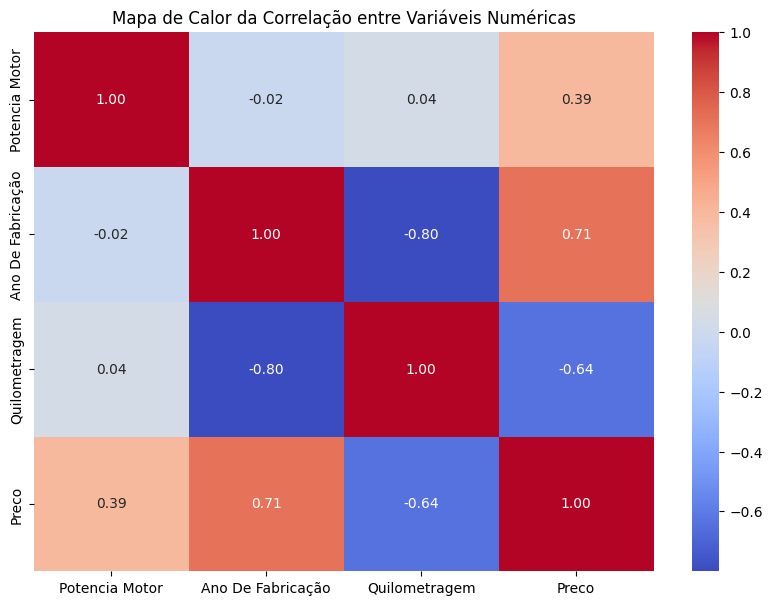

'\nAnalise: Comparativo de Colunas Númericas x Preço.\nPotencia Motor: 0.39, Vermelho mais claro, entende-se que quanto mais potente for o carro, mais caro ele é.\nAno de fabricação: 0.71, Vermelho mais escuro, entende-se que quanto maior o ano, mais recente ou novo, mais caro o carro é.\nQuilometragem: 0.64, Azul mais escuro, entende-se que quanto menor os kms, maior o preço do carro.\n\nTodas nossas análises condiz com a vida real também em relação ao preço dos carros.\n\n'

In [13]:
# Fazendo a correlação para o mapa de calor.
correlacao = df_numericas.corr()

# Exibir a matriz de correlação (para ver os números)
print("Matriz de Correlação:")
print(correlacao)

# Criar o mapa de calor (heatmap)
plt.figure(figsize=(10, 7))
sns.heatmap(
    correlacao,
    annot=True,      
    cmap='coolwarm', 
    fmt='.2f'        
)
plt.title('Mapa de Calor da Correlação entre Variáveis Numéricas')
plt.show()

'''
Analise: Comparativo de Colunas Númericas x Preço.
Potencia Motor: 0.39, Vermelho mais claro, entende-se que quanto mais potente for o carro, mais caro ele é.
Ano de fabricação: 0.71, Vermelho mais escuro, entende-se que quanto maior o ano, mais recente ou novo, mais caro o carro é.
Quilometragem: 0.64, Azul mais escuro, entende-se que quanto menor os kms, maior o preço do carro.

Todas nossas análises condiz com a vida real também em relação ao preço dos carros.

'''